<a href="https://colab.research.google.com/github/geoinformatics-online/How-geospatial-data-work/blob/main/Introduction-to-geospatial-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook illustrates the principal of vector and raster geospatial data using python libraries


First son tecnical operations.
GeoPandas is not included in Colab by default and must first be installed before it can be used.

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 51.6 MB/s 
     |████████████████████████████████| 16.7 MB 47.2 MB/s 


The following imports the libaryes used in this notebook

In [ ]:
# Import the requered libaryes
import numpy as np
import matplotlib.pyplot as plt
import json
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiPoint

The problem this note book adresses is hocational data has to overcome is that there within any, however small area of the earth's surface are infinitely many locations (points), and in order for us to be able to process the information on a computer, we need to convert this into a limited (finite) number of data elements. There are two common solutions to this problem, namely **vector** and **raster**.**bold text**
We start by creating five points using the shapely geomatry point and displaying them as a multiPoint object

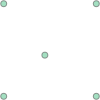

In [ ]:
p1 = Point(1,1)
p2 = Point(1,10)
p3 = Point(10,10)
p4 = Point(10,1)
p5 = Point(5,5)
MultiPoint([p1,p2,p3,p4,p5])

We can now create a line using two or more points, using the LineString type.

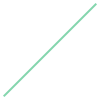

In [ ]:
line = LineString([p1,p3])
line

The intresting aspect is that although a line is only defined by two points it represents the infinity of points lieen on a strate line between the defining points. We can se this by calculating the distance between the line and a point that lies on the straight line between two defining points. If this distance is 0 then the point in question must lie on the line

In [ ]:
line.distance(p5)


0.0

Simulstaly if we define a polygon using three or more points using the Polygon type.

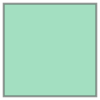

In [ ]:
poly = Polygon([p1,p2,p3,p4])
poly

Again the polygon represents the infinitiv number of points within its borders as we can cee by asking what is the distance to a point theat is inside the polygon but has not been used in its definition.

In [ ]:
poly.distance(p5)

0.0

In [ ]:
geojson = '''{
"type": "FeatureCollection",
"name": "test_2hole",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::25832" } },
"features": [
{ "type": "Feature", "properties": { "building": "9" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 697541.93895748606883, 6171945.235661170445383 ], [ 697543.88907401508186, 6171920.274169598706067 ], [ 697568.460542280459777, 6171921.834262822754681 ], [ 697567.290472363005392, 6171946.795754393562675 ], [ 697541.93895748606883, 6171945.235661170445383 ] ] ] } },
{ "type": "Feature", "properties": { "building": "2" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 697587.181660958798602, 6171969.807129436172545 ], [ 697589.521800793590955, 6171917.544006458483636 ], [ 697640.224830547580495, 6171921.054216210730374 ], [ 697640.614853853359818, 6171971.757245964370668 ], [ 697587.181660958798602, 6171969.807129436172545 ] ], [ [ 697603.172616496565752, 6171955.766290427185595 ], [ 697602.002546579227783, 6171933.144938690587878 ], [ 697623.453828398138285, 6171933.924985302612185 ], [ 697625.013921621371992, 6171955.376267121173441 ], [ 697603.172616496565752, 6171955.766290427185595 ] ] ] } }
]
}'''


In [ ]:
data = json.loads(geojson)

In [ ]:
for feature in data['features']:
    print(feature['geometry']['type'])
    print(feature['geometry']['coordinates'])

Polygon
[[[697541.9389574861, 6171945.23566117], [697543.8890740151, 6171920.274169599], [697568.4605422805, 6171921.834262823], [697567.290472363, 6171946.795754394], [697541.9389574861, 6171945.23566117]]]
Polygon
[[[697587.1816609588, 6171969.807129436], [697589.5218007936, 6171917.5440064585], [697640.2248305476, 6171921.054216211], [697640.6148538534, 6171971.757245964], [697587.1816609588, 6171969.807129436]], [[697603.1726164966, 6171955.766290427], [697602.0025465792, 6171933.144938691], [697623.4538283981, 6171933.924985303], [697625.0139216214, 6171955.376267121], [697603.1726164966, 6171955.766290427]]]


In [ ]:
print(data)

{'type': 'FeatureCollection', 'name': 'test_2hole', 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::25832'}}, 'features': [{'type': 'Feature', 'properties': {'building': '9'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[697541.9389574861, 6171945.23566117], [697543.8890740151, 6171920.274169599], [697568.4605422805, 6171921.834262823], [697567.290472363, 6171946.795754394], [697541.9389574861, 6171945.23566117]]]}}, {'type': 'Feature', 'properties': {'building': '2'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[697587.1816609588, 6171969.807129436], [697589.5218007936, 6171917.5440064585], [697640.2248305476, 6171921.054216211], [697640.6148538534, 6171971.757245964], [697587.1816609588, 6171969.807129436]], [[697603.1726164966, 6171955.766290427], [697602.0025465792, 6171933.144938691], [697623.4538283981, 6171933.924985303], [697625.0139216214, 6171955.376267121], [697603.1726164966, 6171955.766290427]]]}}]}


In [ ]:
#test = gpd.read_file('/vsicurl/https://github.com/Toblerity/Fiona/raw/master/tests/data/gre.shp')
test = gpd.read_file('/vsicurl/https://raw.githubusercontent.com/Esbern/GIS_demo/main/test_2hole.geojson')
print(test.head())

  building                                           geometry
0        9  POLYGON ((697541.939 6171945.236, 697543.889 6...
1        2  POLYGON ((697587.182 6171969.807, 697589.522 6...


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

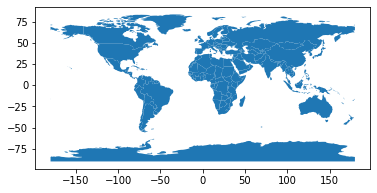

In [ ]:
world.plot();

In [ ]:
from shapely.geometry import Point, Polygon, shape

In [ ]:
from shapely.geometry import Polygon



# Polygon exterior:
p = [[20,767],[54,744],[107,707],
 [190,654],[265,609],[363,548],
 [462,484],[514,447],[603,389],
 [682,337],[726,310],[757,290],
 [786,277],[820,259],[843,249],
 [881,231],[921,215],[975,197],
 [1048,174],[1089,163],[1141,152],
 [1212,137],[1270,121],[1271,64],
 [1207,78],[1163,89],[1096,103],
 [1048,115],[1001,129],[949,144],
 [905,157],[874,170],[830,187],
 [781,208],[730,236],[696,255],
 [652,282],[606,306],[561,340],
 [512,370],[478,393],[436,418],
 [385,453],[330,490],[285,521],
 [229,566],[183,603],[123,652],
 [70,698],[13,749]]

# Define interior "holes":
interiors = {}
interiors[0] = [[290,543],[301,560],[393,501],[377,482]]
interiors[1] = [[507,392],[549,363],[553,367],[572,352],[588,372],[522,415]]
interiors[2] = [[599,340],[636,316],[648,334],[612,357]]
interiors[3] = [[714,262],[727,284],[821,238],[811,215]]
interiors[4] = [[850,218],[935,185],[937,187],[850,221]]
interiors[5] = [[959,159],[1066,129],[1071,146],[966,177]]
interiors[6] = [[1119,133],[1175,122],[1178,123],[1119,134]]
interiors[7] = [[1211,102],[1266,91],[1267,97],[1212,108],[1211,102]]

i_p = {k: Polygon(v) for k, v in interiors.items()}


zone = Polygon(p, [zone.exterior.coords for zone in i_p.values() \
                    if zone.within(Polygon(p)) is True])

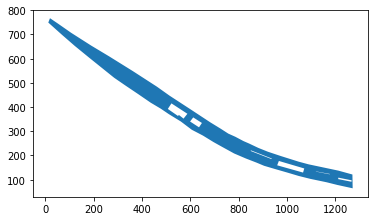

In [ ]:
p = gpd.GeoSeries(zone)
p.plot()
plt.show()

In [ ]:
!pip install contextily
import contextily as ctx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mapclassify

In [ ]:
nybb.explore()


<string>:6: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


AttributeError: ignored

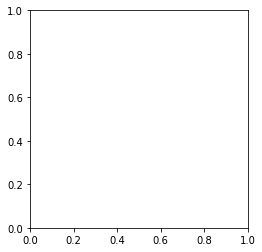

In [ ]:

from shapely.geometry.polygon import LinearRing


# 1: valid ring
fig, ax = plt.subplots()
ax.set_aspect('equal')

ring = LinearRing([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 0.8), (0, 0)])
ring2 = LinearRing([(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)])

plt.plot(ring, ax = ax)
ax.set_title('a) valid')
#ring.plot(ax=ax, color='white', edgecolor='black')


#2: invalid self-touching ring
#ring2.plot(ax=ax, color='red', edgecolor='red')




plt.show()